<a href="https://colab.research.google.com/github/hemoabdullah/ML-SMT5/blob/main/JS09_2341720203_Hammam_Abdullah_BG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum



In [2]:
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset-selected.csv')
display(df.head())

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [4]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split again between validation and testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Check the respective dataset sizes

print(f'Original data count: {df.shape[0]}')
print(f'Training data count: {df_train.shape[0]}')
print(f'Validation data count: {df_val.shape[0]}')
print(f'Test data count: {df_test.shape[0]}')

# Check the ratio of each label
print('=========')
print(f'Original label counts:\n{df.Survived.value_counts()}')
print(f'Training label counts:\n{df_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df_val.Survived.value_counts()}')
print(f'Test label counts:\n{df_test.Survived.value_counts()}')

Original data count: 891
Training data count: 712
Validation data count: 89
Test data count: 90
Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    53
1    36
Name: count, dtype: int64
Test label counts:
Survived
0    57
1    33
Name: count, dtype: int64


### Stratified Split

In [6]:
import pandas as pd

df2 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
display(df2.head())

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [7]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split again between validation and testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Check the respective dataset sizes

print(f'Original label counts:\n{df2.Survived.value_counts()}')
print(f'Training label counts:\n{df2_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df2_val.Survived.value_counts()}')
print(f'Test label counts:\n{df2_test.Survived.value_counts()}')

Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    51
1    38
Name: count, dtype: int64
Test label counts:
Survived
0    59
1    31
Name: count, dtype: int64


### Cross Validation 1

In [9]:
import pandas as pd

df3 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [10]:
# Implementation of k-fold cross-validation (random) with training and testing only
from sklearn.model_selection import KFold

# initialize the kfold object
kf = KFold(n_splits=4)
print(f'Number of folds: {kf.get_n_splits()}')
print(f'KFold object: {kf}')

# Perform splitting with KFold
kf_split = kf.split(df3)
print(f'Number of rows in df: {df.shape[0]}')

# check the data indices for each fold
for train_index, test_index in kf_split:
    print(f'Train index: {train_index} | Test index: {test_index}')

Number of folds: 4
KFold object: KFold(n_splits=4, random_state=None, shuffle=False)
Number of rows in df: 891
Train index: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438


### Cross Validation 2

In [14]:
import pandas as pd

df4 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [15]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

# Lab 1

### Step 1

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

### Step 2

In [16]:
# import package
import numpy as np
import pandas as pd

### Step 3

In [24]:
# read data from CSV file
data = pd.read_csv('dataset.csv')

### Step 4

In [25]:
# view some initial data
data.head()

# check data dimensions
data.shape

# information about the data
data.info()

# data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Step 5

In [26]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

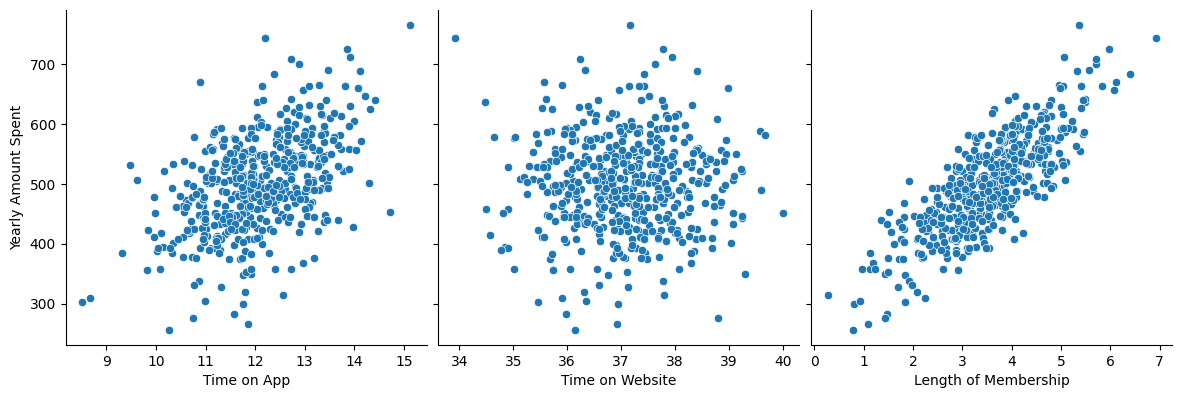

In [27]:
# visualize data with pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

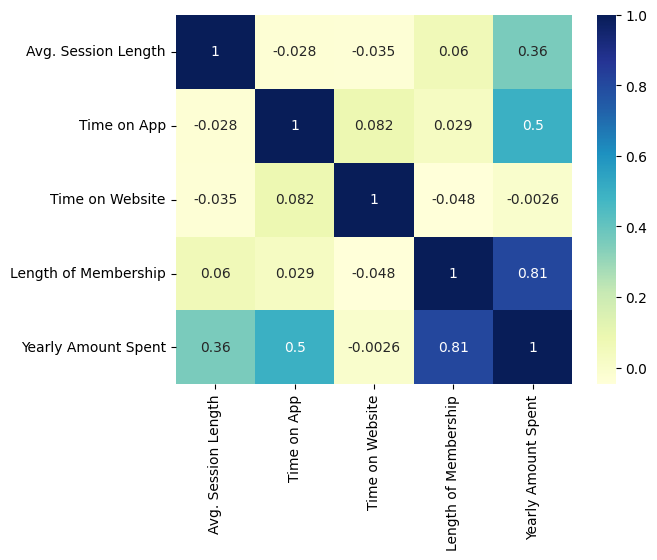

In [28]:
# visualize correlation with heatmap
sns.heatmap(data.drop(['Email', 'Address', 'Avatar'], axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

### Step 6

In [29]:
# Create independent variable X and Y, example selection from prior correlation analysis
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [30]:
# Split training and test data with a 7:3 proportion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
# Model training
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

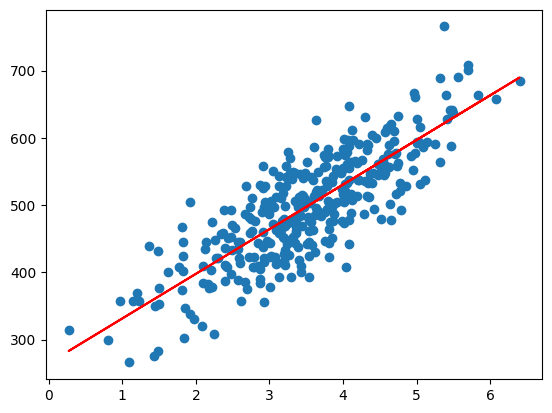

In [32]:
# Visualization of regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Step 7

In [33]:
# Predict y_value from the trained x data
y_train_pred = lr.predict(X_train_sm)

# Calculating residuals
res = (y_train - y_train_pred)

/tmp/ipython-input-4216909171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


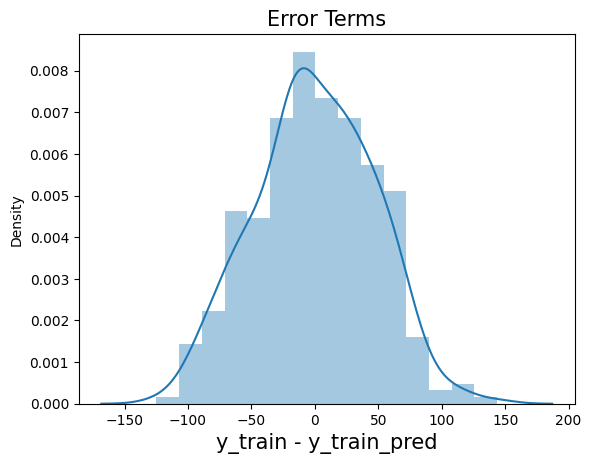

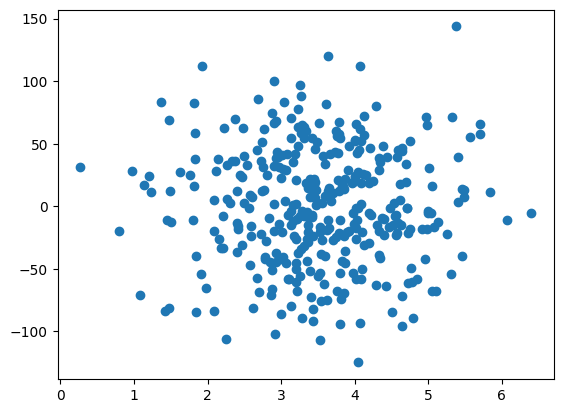

In [34]:
# Residual histogram
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Residual scatter plot
plt.scatter(X_train, res)
plt.show()

### Step  8

In [35]:
# Prediction on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [36]:
# Compute R-squared value
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

### Step 9

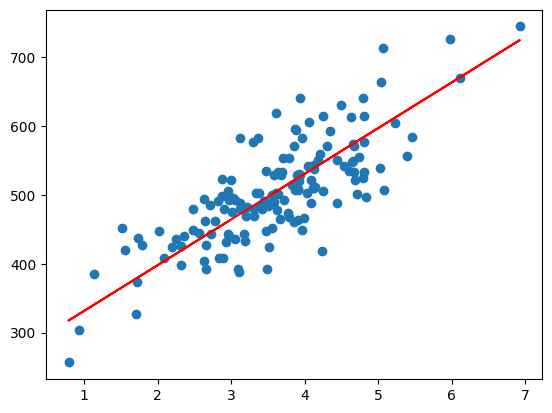

In [37]:
# Visualize test data and prediction results
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Lab 2

### Step 1

In [38]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 2

In [40]:
# Importing the dataset (Ensure you have the CSV file 'Posisi_gaji.csv' in the same directory)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Change to a single column only

### Step 3

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### Step 4

In [42]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

### Step 5

/tmp/ipython-input-3243201412.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


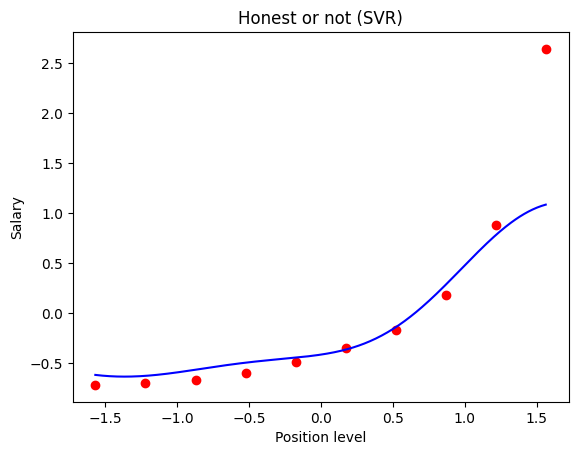

In [43]:
# Visualizing SVR results (higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Honest or not (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Step 6

In [44]:
# Predicting the result
# Create a 2D array containing the position level to be predicted
position_level_to_predict = np.array([[6.5]])
# Feature scaling for the data to be predicted
position_level_to_predict = sc_X.transform(position_level_to_predict)
# Perform prediction using the SVR model
predicted_salary = regressor.predict(position_level_to_predict)
# Return the predicted result to the original scale
predicted_salary = sc_y.inverse_transform(predicted_salary.reshape(-1, 1))

### Step 7

In [45]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", predicted_salary[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


### Step 8

In [46]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Calculating MAE
mae = mean_absolute_error(y_actual, y_pred)

# Calculating MSE
mse = mean_squared_error(y_actual, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# Lab Assignment

## **General Instructions:**

1. You will utilize the "Medical Cost Personal Datasets". Ensure that you have downloaded this dataset.
2. Employ the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib, and Scikit-Learn to perform regression analysis and SVR.

## Tasks

1. Identify the variables to be used as independent variables (features) and the target variable (personal medical cost).
2. Partition the dataset into training and testing subsets with an appropriate proportion.
3. Perform feature scaling if required.
4. Construct a multiple linear regression model using Scikit-Learn.
5. Train the model on the training data and perform predictions on the testing data.
6. Evaluate the model by computing metrics such as R-squared, MSE, and MAE. Present the evaluation results.
7. Repeat step 4 using an SVR model. You may experiment by performing *hyperparameter tuning*.

## Additional Notes

* Ensure to provide a concise description of the dataset used, including descriptions of relevant variables.
* Present relevant data visualizations such as scatter plots or other graphs if necessary for improved understanding.
* Analyze the results obtained in your practical assignment.



#### Answer

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
try:
    df = pd.read_csv("insurance.csv")

    # --- Initial Preprocessing ---
    # Convert categorical variables to numerical (needed before splitting)
    df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    print("Data loaded and preprocessed (one-hot encoding).")
    print(df_processed.head())

except FileNotFoundError:
    print("Error: 'insurance.csv' not found. Make sure it is in the same directory.")

Data loaded and preprocessed (one-hot encoding).
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  



1. Identify the variables to be used as independent variables (features) and the target variable (personal medical cost).

In [48]:
# Task 1: Identify the variables
# Target variable (y)
y = df_processed['charges']

# Independent variables (X)
# We drop the original target 'charges'
X = df_processed.drop('charges', axis=1)

print("\n--- Task 1: Variables Identified ---")
print(f"Target variable (y): 'charges'")
print(f"Features (X) columns: {list(X.columns)}")


--- Task 1: Variables Identified ---
Target variable (y): 'charges'
Features (X) columns: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


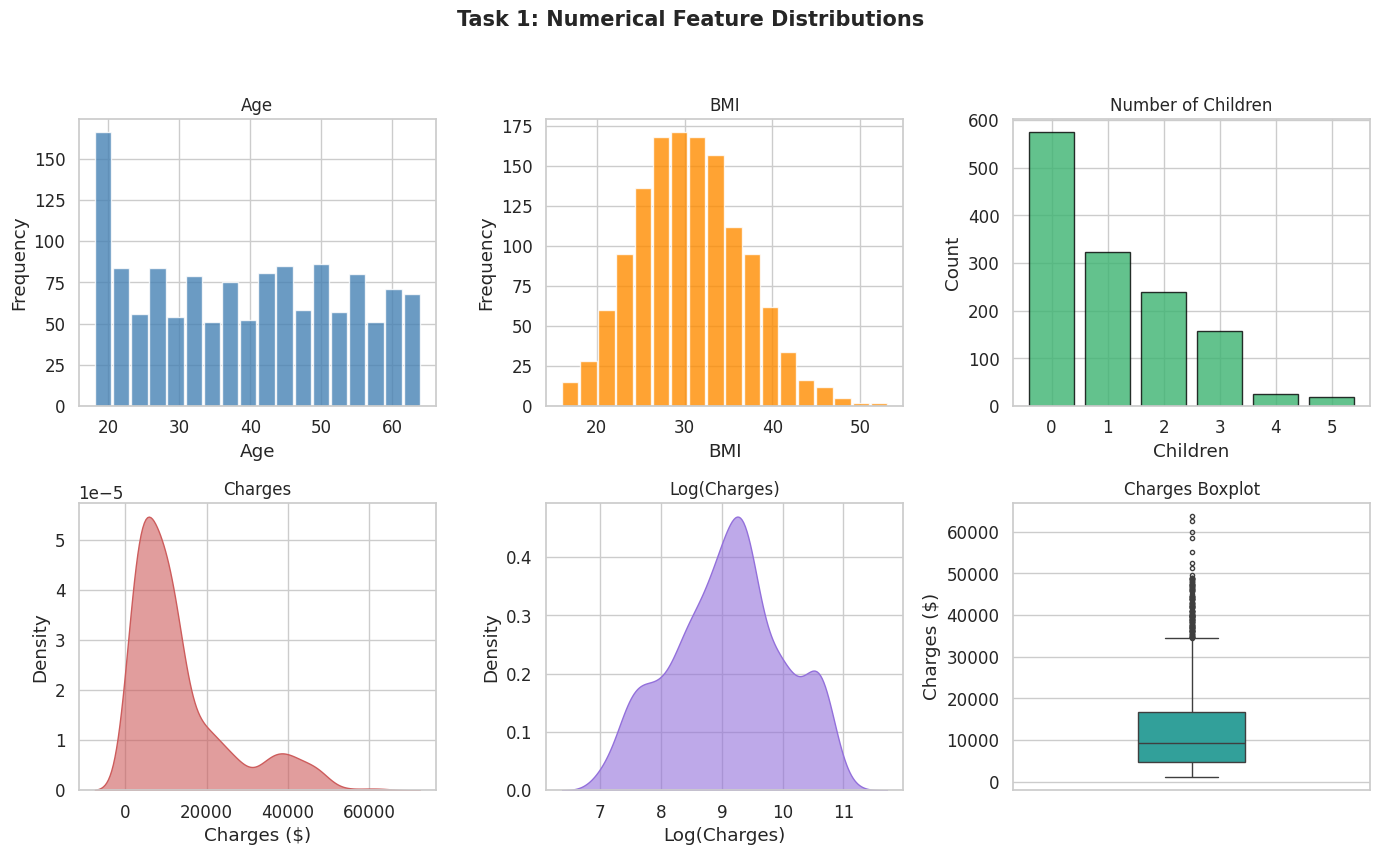

In [54]:
# ===============================================
# 📊 Visualization of Numerical Variables (Custom Style)
# ===============================================

# Set up figure layout
fig, ax = plt.subplots(2, 3, figsize=(14, 9))
fig.suptitle("Task 1: Numerical Feature Distributions", fontsize=15, fontweight="bold")

# --- Age ---
ax[0, 0].hist(df["age"], bins=18, color="#4682B4", alpha=0.8, rwidth=0.9)
ax[0, 0].set_title("Age", fontsize=12)
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Frequency")

# --- BMI ---
ax[0, 1].hist(df["bmi"], bins=18, color="#FF8C00", alpha=0.8, rwidth=0.9)
ax[0, 1].set_title("BMI", fontsize=12)
ax[0, 1].set_xlabel("BMI")
ax[0, 1].set_ylabel("Frequency")

# --- Children ---
ax[0, 2].bar(df["children"].value_counts().index,
             df["children"].value_counts().values,
             color="#3CB371", alpha=0.8, edgecolor="black")
ax[0, 2].set_title("Number of Children", fontsize=12)
ax[0, 2].set_xlabel("Children")
ax[0, 2].set_ylabel("Count")

# --- Charges ---
sns.kdeplot(df["charges"], fill=True, ax=ax[1, 0], color="#CD5C5C", alpha=0.6)
ax[1, 0].set_title("Charges", fontsize=12)
ax[1, 0].set_xlabel("Charges ($)")
ax[1, 0].set_ylabel("Density")

# --- Log Charges ---
sns.kdeplot(np.log(df["charges"]), fill=True, ax=ax[1, 1], color="#9370DB", alpha=0.6)
ax[1, 1].set_title("Log(Charges)", fontsize=12)
ax[1, 1].set_xlabel("Log(Charges)")
ax[1, 1].set_ylabel("Density")

# --- Boxplot Charges ---
sns.boxplot(y=df["charges"], ax=ax[1, 2], color="#20B2AA", fliersize=3, width=0.3)
ax[1, 2].set_title("Charges Boxplot", fontsize=12)
ax[1, 2].set_ylabel("Charges ($)")

# Improve spacing and layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [55]:
# Task 2: Partition the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Task 2: Data Partitioned ---")
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


--- Task 2: Data Partitioned ---
Training set shape: X_train=(1070, 8), y_train=(1070,)
Testing set shape: X_test=(268, 8), y_test=(268,)


/tmp/ipython-input-2058063594.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, ax=ax[0, 0], palette=["#5A9BD5", "#F5A45D"])
/tmp/ipython-input-2058063594.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="smoker", data=df, ax=ax[0, 1], palette=["#6ABF69", "#E15759"])
/tmp/ipython-input-2058063594.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_order, y=df["region"].value_counts().values,
/tmp/ipython-input-2058063594.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

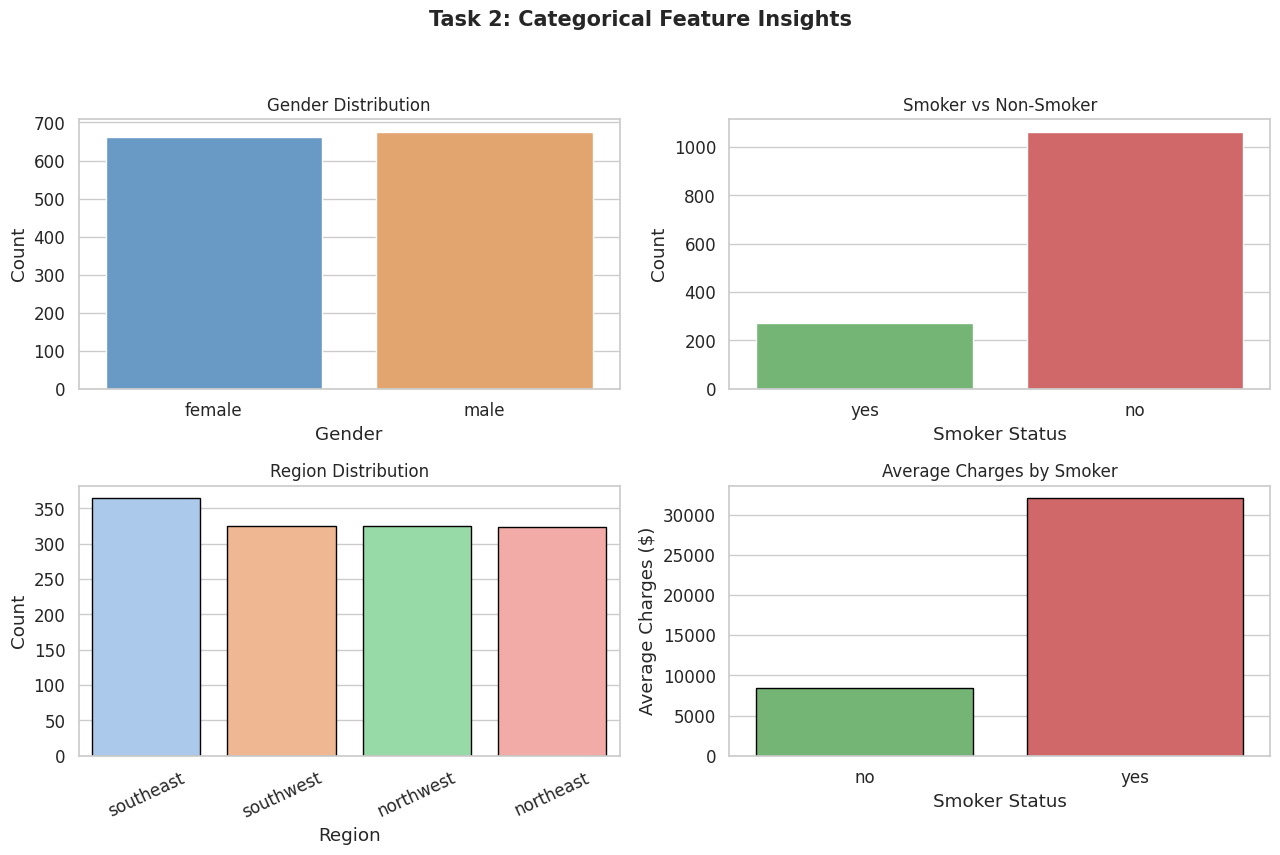

Summary Statistics: Mean, Median, and Std of Charges by Category

▶ Sex
            mean   median       std
sex                                
female  12569.58  9412.96  11128.70
male    13956.75  9369.62  12971.03

▶ Smoker
            mean    median       std
smoker                              
no       8434.27   7345.41   5993.78
yes     32050.23  34456.35  11541.55

▶ Region
               mean    median       std
region                                 
northeast  13406.38  10057.65  11255.80
northwest  12417.58   8965.80  11072.28
southeast  14735.41   9294.13  13971.10
southwest  12346.94   8798.59  11557.18


In [57]:
# ===============================================
# 🧩 Task 2: Analysis of Categorical Variables (Custom Style)
# ===============================================

import seaborn as sns
import matplotlib.pyplot as plt

# Apply consistent visual theme
sns.set(style="whitegrid", font_scale=1.1, palette="muted")

# Create figure and layout
fig, ax = plt.subplots(2, 2, figsize=(13, 9))
fig.suptitle("Task 2: Categorical Feature Insights", fontsize=15, fontweight="bold")

# --- Gender Distribution ---
sns.countplot(x="sex", data=df, ax=ax[0, 0], palette=["#5A9BD5", "#F5A45D"])
ax[0, 0].set_title("Gender Distribution", fontsize=12)
ax[0, 0].set_xlabel("Gender")
ax[0, 0].set_ylabel("Count")

# --- Smoker Distribution ---
sns.countplot(x="smoker", data=df, ax=ax[0, 1], palette=["#6ABF69", "#E15759"])
ax[0, 1].set_title("Smoker vs Non-Smoker", fontsize=12)
ax[0, 1].set_xlabel("Smoker Status")
ax[0, 1].set_ylabel("Count")

# --- Region Distribution ---
region_order = df["region"].value_counts().index
sns.barplot(x=region_order, y=df["region"].value_counts().values,
            ax=ax[1, 0], palette="pastel", edgecolor="black")
ax[1, 0].set_title("Region Distribution", fontsize=12)
ax[1, 0].set_xlabel("Region")
ax[1, 0].set_ylabel("Count")
ax[1, 0].tick_params(axis="x", rotation=25)

# --- Average Charges by Smoker ---
avg_smoke = df.groupby("smoker")["charges"].mean().reset_index()
sns.barplot(x="smoker", y="charges", data=avg_smoke, ax=ax[1, 1],
            palette=["#6ABF69", "#E15759"], edgecolor="black")
ax[1, 1].set_title("Average Charges by Smoker", fontsize=12)
ax[1, 1].set_xlabel("Smoker Status")
ax[1, 1].set_ylabel("Average Charges ($)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ===============================================
# 📈 Summary Statistics by Category
# ===============================================
print("=" * 65)
print("Summary Statistics: Mean, Median, and Std of Charges by Category")
print("=" * 65)

def show_summary(feature):
    summary = df.groupby(feature)["charges"].agg(["mean", "median", "std"]).round(2)
    print(f"\n▶ {feature.capitalize()}")
    print(summary)

show_summary("sex")
show_summary("smoker")
show_summary("region")


# TASK 2 - Partition the dataset into training and testing subsets with an appropriate proportion.

--------------------------------------------------
Train-Test Split Results
--------------------------------------------------
Training set size: 1070 samples (80.0%)
Testing set size: 268 samples (20.0%)

Training features shape: (1070, 8)
Training target shape: (1070,)
Testing features shape: (268, 8)
Testing target shape: (268,)

--------------------------------------------------
Training Set Statistics
--------------------------------------------------
count     1070.000000
mean     13346.089736
std      12019.510778
min       1121.873900
25%       4897.667387
50%       9575.442100
75%      16746.657400
max      62592.873090
Name: charges, dtype: float64

--------------------------------------------------
Testing Set Statistics
--------------------------------------------------
count      268.000000
mean     12968.317063
std      12483.196202
min       1131.506600
25%       4288.744850
50%       8487.880300
75%      16367.829375
max      63770.428010
Name: charges, dtype: float64


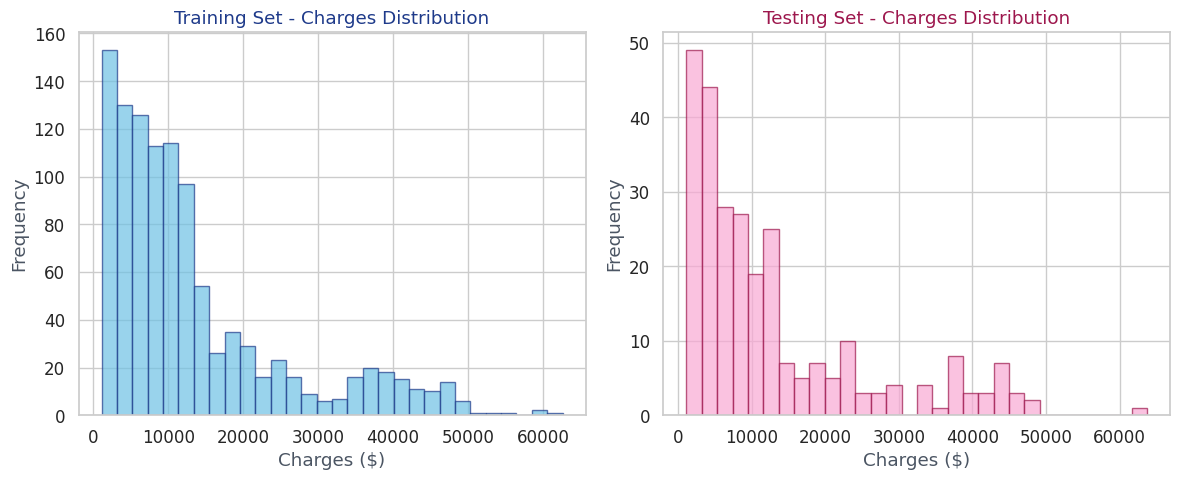

In [60]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display train-test split results
print("-" * 50)
print("Train-Test Split Results")
print("-" * 50)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing target shape: {y_test.shape}")

# Display training set statistics
print("\n" + "-" * 50)
print("Training Set Statistics")
print("-" * 50)
print(y_train.describe())

# Display testing set statistics
print("\n" + "-" * 50)
print("Testing Set Statistics")
print("-" * 50)
print(y_test.describe())

# Visualize the charge distributions for train and test sets (Pastel Theme)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set
axes[0].hist(y_train, bins=30, color="#6EC1E4", edgecolor="#1E3A8A", alpha=0.7)
axes[0].set_title("Training Set - Charges Distribution", color="#1E3A8A")
axes[0].set_xlabel("Charges ($)", color="#4B5563")
axes[0].set_ylabel("Frequency", color="#4B5563")

# Testing set
axes[1].hist(y_test, bins=30, color="#F9A8D4", edgecolor="#9D174D", alpha=0.7)
axes[1].set_title("Testing Set - Charges Distribution", color="#9D174D")
axes[1].set_xlabel("Charges ($)", color="#4B5563")
axes[1].set_ylabel("Frequency", color="#4B5563")

plt.tight_layout()
plt.show()

# Task 3 - Perform feature scaling if required.


🔹 FEATURE SCALING REPORT
Training set shape after scaling: (1070, 8)
Testing set shape after scaling : (268, 8)

------------------------------------------------------------
Sample of Training Data (Before Scaling):
------------------------------------------------------------
      age    bmi  children  sex_male  smoker_yes  region_northwest  \
560    46  19.95         2     False       False              True   
1285   47  24.32         0     False       False             False   
1142   52  24.86         0     False       False             False   
969    39  34.32         5     False       False             False   
486    54  21.47         3     False       False              True   

      region_southeast  region_southwest  
560              False             False  
1285             False             False  
1142              True             False  
969               True             False  
486              False             False  

-------------------------------------------

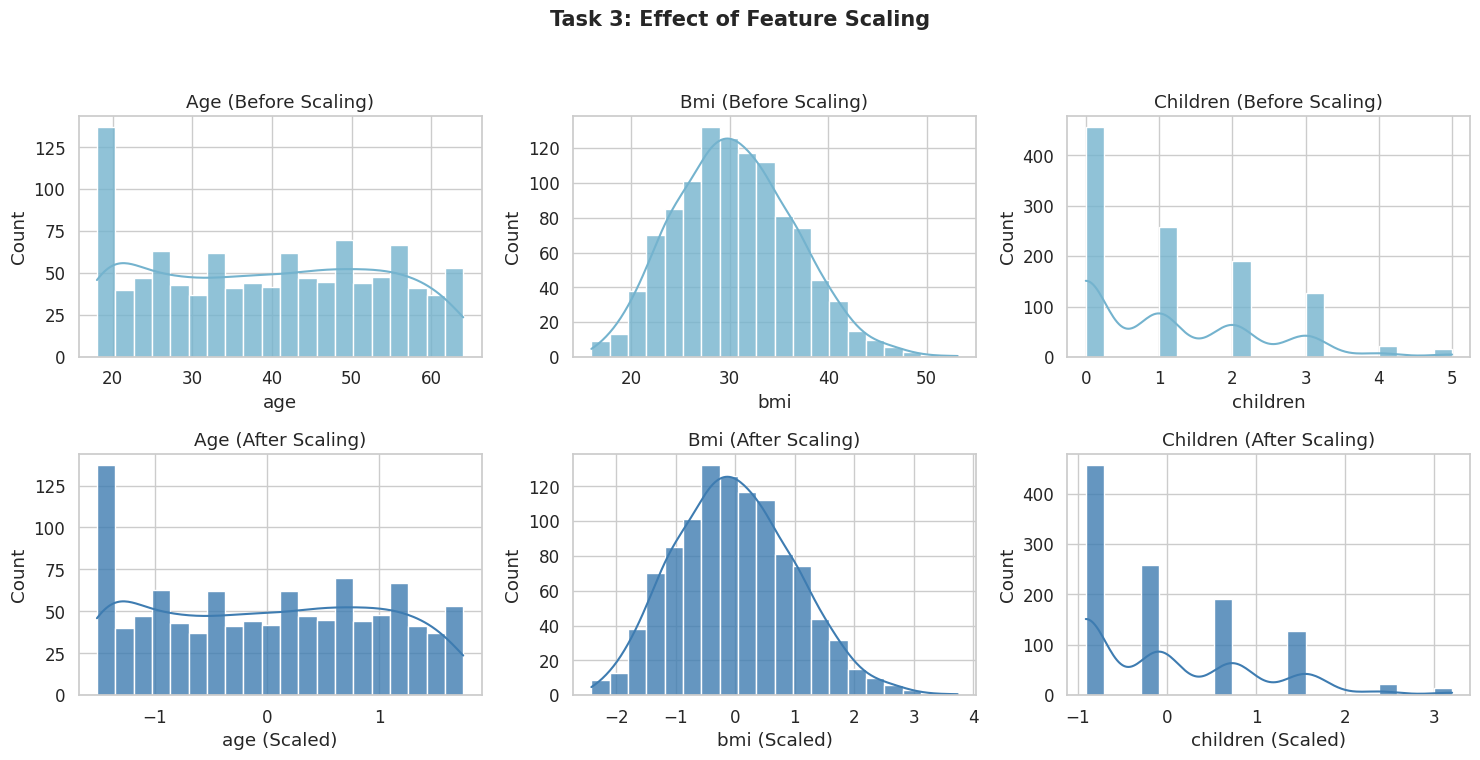

In [62]:
# ===============================================
# ⚙️ Feature Scaling using StandardScaler (Custom Style)
# ===============================================

from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and apply StandardScaler
scaler = StandardScaler()

# Fit on training set, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# --- Summary output ---
print("=" * 60)
print("🔹 FEATURE SCALING REPORT")
print("=" * 60)
print(f"Training set shape after scaling: {X_train_scaled.shape}")
print(f"Testing set shape after scaling : {X_test_scaled.shape}")

print("\n" + "-" * 60)
print("Sample of Training Data (Before Scaling):")
print("-" * 60)
print(X_train.head())

print("\n" + "-" * 60)
print("Sample of Training Data (After Scaling):")
print("-" * 60)
print(X_train_scaled_df.head())

print("\n" + "-" * 60)
print("Training Feature Statistics After Scaling:")
print("-" * 60)
print(X_train_scaled_df.describe().round(3))

# ===============================================
# 📊 Visualization: Comparing Before vs After Scaling
# ===============================================
sns.set(style="whitegrid", font_scale=1.1)

num_features = ["age", "bmi", "children"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Task 3: Effect of Feature Scaling", fontsize=15, fontweight="bold")

for i, feature in enumerate(num_features):
    # --- Before scaling ---
    sns.histplot(X_train[feature], bins=20, kde=True,
                 color="#74B3CE", ax=axes[0, i], alpha=0.8)
    axes[0, i].set_title(f"{feature.capitalize()} (Before Scaling)")
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel("Count")

    # --- After scaling ---
    sns.histplot(X_train_scaled_df[feature], bins=20, kde=True,
                 color="#3E7CB1", ax=axes[1, i], alpha=0.8)
    axes[1, i].set_title(f"{feature.capitalize()} (After Scaling)")
    axes[1, i].set_xlabel(f"{feature} (Scaled)")
    axes[1, i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Separate Features and Target

In [59]:
# Separate features (X) and target variable (y)
X = df_processed.drop("charges", axis=1)
y = df_processed["charges"]

# Display shapes and feature details
print("-" * 50)
print("Features (X) and Target (y) Separation")
print("-" * 50)
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

print("\n" + "-" * 50)
print("Feature names:")
print("-" * 50)
print(X.columns.tolist())

print("\n" + "-" * 50)
print("First 5 rows of features (X):")
print("-" * 50)
print(X.head())

--------------------------------------------------
Features (X) and Target (y) Separation
--------------------------------------------------
Feature matrix shape: (1338, 8)
Target vector shape: (1338,)

--------------------------------------------------
Feature names:
--------------------------------------------------
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

--------------------------------------------------
First 5 rows of features (X):
--------------------------------------------------
   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  regi

# TASK 4 - Construct a multiple linear regression model using Scikit-Learn.


LINEAR REGRESSION MODEL SUMMARY
Intercept: 13,346.090

Coefficients per Feature:

         Feature  Coefficient
      smoker_yes  9558.481409
             age  3614.975415
             bmi  2036.228123
        children   516.890247
        sex_male    -9.293101
region_northwest  -158.140981
region_southeast  -290.157047
region_southwest  -349.110678


/tmp/ipython-input-1300331232.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


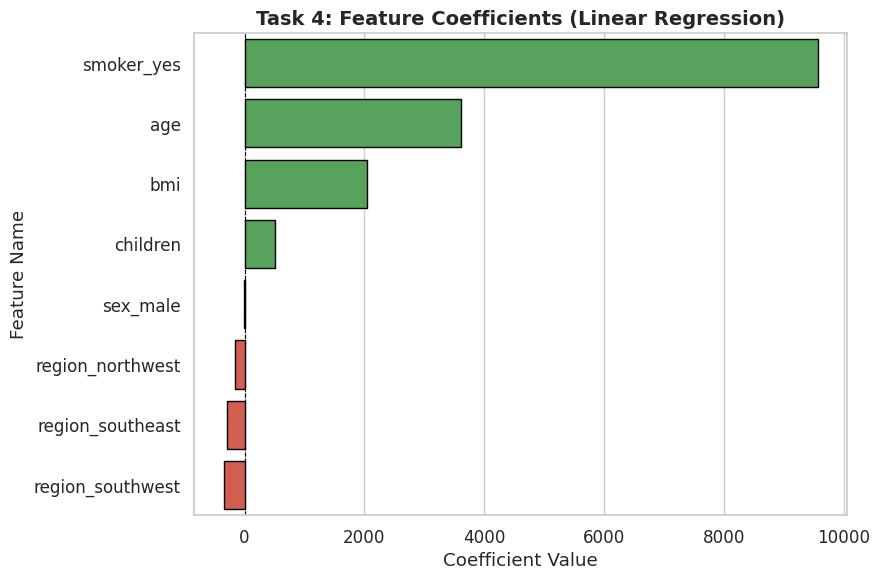

In [63]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# --- Display model details ---
print("=" * 60)
print("LINEAR REGRESSION MODEL SUMMARY")
print("=" * 60)
print(f"Intercept: {linreg.intercept_:,.3f}")
print("\nCoefficients per Feature:\n")

# Create a tidy DataFrame of coefficients
coef_table = (
    pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": linreg.coef_
    })
    .sort_values(by="Coefficient", ascending=False)
    .reset_index(drop=True)
)

# Display coefficient values
print(coef_table.to_string(index=False))

# ===============================================
# 📊 Visualizing Coefficients
# ===============================================
sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(9, 6))
palette = ["#4CAF50" if c > 0 else "#E74C3C" for c in coef_table["Coefficient"]]

sns.barplot(
    x="Coefficient", y="Feature",
    data=coef_table,
    palette=palette,
    edgecolor="black"
)

plt.title("Task 4: Feature Coefficients (Linear Regression)", fontsize=14, fontweight="bold")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.tight_layout()
plt.show()


# Task 5 - Multiple Linear Regression Predictions in Multiple Linear Regression

LINEAR REGRESSION PREDICTION SUMMARY
Training predictions: 1070 samples
Testing predictions : 268 samples

Sample Comparison: Actual vs Predicted (Test Set)
     Actual    Predicted   Difference  Error (%)
 9095.06825  8969.550274   125.517976       1.38
 5272.17580  7068.747443 -1796.571643     -34.08
29330.98315 36858.410912 -7527.427762     -25.66
 9301.89355  9454.678501  -152.784951      -1.64
33750.29180 26973.173457  6777.118343      20.08
 4536.25900 10864.113164 -6327.854164    -139.49
 2117.33885   170.280841  1947.058009      91.96
14210.53595 16903.450287 -2692.914337     -18.95
 3732.62510  1092.430936  2640.194164      70.73
10264.44210 11218.343184  -953.901084      -9.29


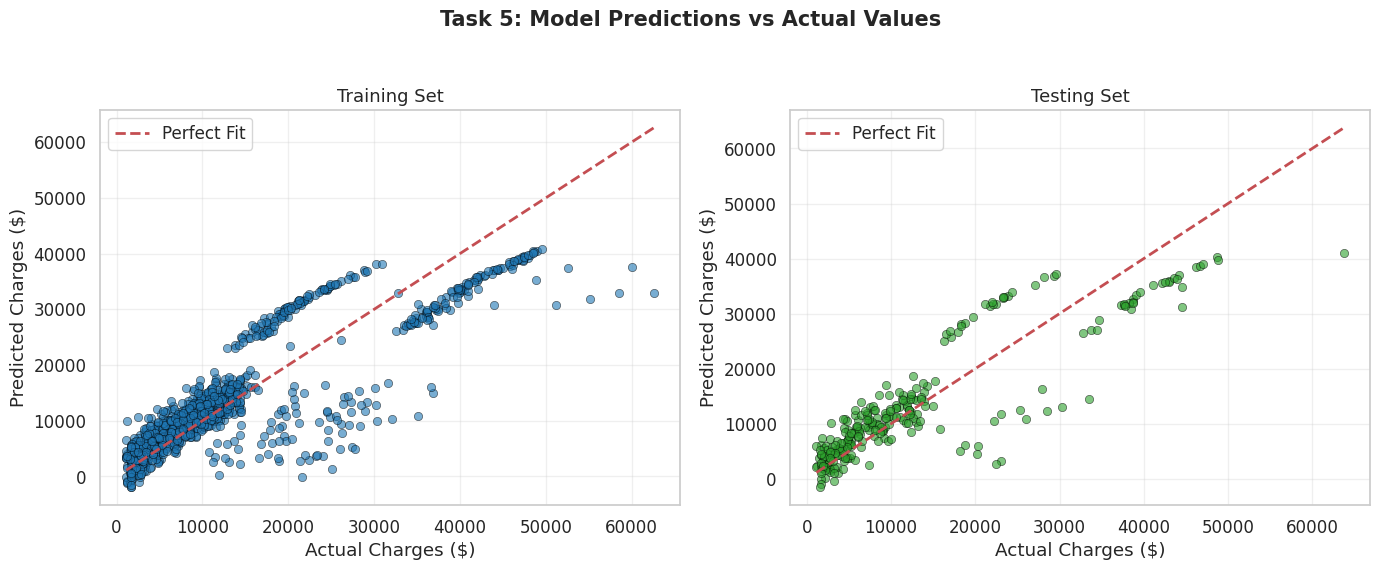

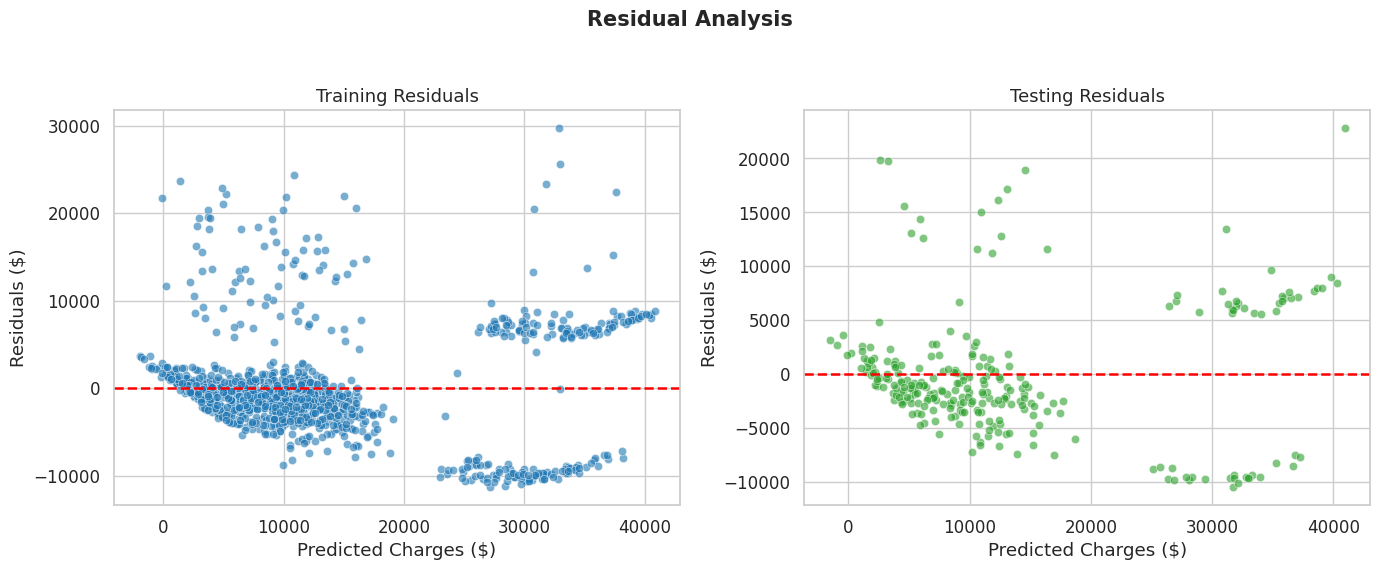

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generate predictions
y_pred_train = linreg.predict(X_train_scaled)
y_pred_test = linreg.predict(X_test_scaled)

# --- Summary output ---
print("=" * 60)
print("LINEAR REGRESSION PREDICTION SUMMARY")
print("=" * 60)
print(f"Training predictions: {len(y_pred_train)} samples")
print(f"Testing predictions : {len(y_pred_test)} samples")

# Create a quick comparison (first 10 test values)
comparison = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred_test[:10],
})
comparison["Difference"] = comparison["Actual"] - comparison["Predicted"]
comparison["Error (%)"] = (comparison["Difference"] / comparison["Actual"] * 100).round(2)

print("\n" + "=" * 60)
print("Sample Comparison: Actual vs Predicted (Test Set)")
print("=" * 60)
print(comparison.to_string(index=False))

# ===============================================
# 🔹 Visualization: Predicted vs Actual
# ===============================================
sns.set(style="whitegrid", font_scale=1.1)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Task 5: Model Predictions vs Actual Values", fontsize=15, fontweight="bold")

# --- Training ---
sns.scatterplot(x=y_train, y=y_pred_train, ax=ax[0], color="#1f77b4", edgecolor="black", alpha=0.6)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
           "r--", lw=2, label="Perfect Fit")
ax[0].set_title("Training Set", fontsize=13)
ax[0].set_xlabel("Actual Charges ($)")
ax[0].set_ylabel("Predicted Charges ($)")
ax[0].legend()
ax[0].grid(alpha=0.3)

# --- Testing ---
sns.scatterplot(x=y_test, y=y_pred_test, ax=ax[1], color="#2ca02c", edgecolor="black", alpha=0.6)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
           "r--", lw=2, label="Perfect Fit")
ax[1].set_title("Testing Set", fontsize=13)
ax[1].set_xlabel("Actual Charges ($)")
ax[1].set_ylabel("Predicted Charges ($)")
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

res_train = y_train - y_pred_train
res_test = y_test - y_pred_test

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Residual Analysis", fontsize=15, fontweight="bold")

# --- Train residuals ---
sns.scatterplot(x=y_pred_train, y=res_train, ax=ax[0], color="#1f77b4", alpha=0.6)
ax[0].axhline(0, color="red", linestyle="--", lw=1.8)
ax[0].set_title("Training Residuals", fontsize=13)
ax[0].set_xlabel("Predicted Charges ($)")
ax[0].set_ylabel("Residuals ($)")

# --- Test residuals ---
sns.scatterplot(x=y_pred_test, y=res_test, ax=ax[1], color="#2ca02c", alpha=0.6)
ax[1].axhline(0, color="red", linestyle="--", lw=1.8)
ax[1].set_title("Testing Residuals", fontsize=13)
ax[1].set_xlabel("Predicted Charges ($)")
ax[1].set_ylabel("Residuals ($)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Task 6: Support Vector Regression (SVR) - Training & Evaluation

SUPPORT VECTOR REGRESSION (SVR) - PERFORMANCE SUMMARY

TRAINING SET:
----------------------------------------------------------------------
R² Score : 0.2344 (23.44%)
MSE      : $110,500,554.36
RMSE     : $10,511.92
MAE      : $5,602.81

TESTING SET:
----------------------------------------------------------------------
R² Score : 0.2697 (26.97%)
MSE      : $113,374,592.97
RMSE     : $10,647.75
MAE      : $5,695.16

DIFFERENCE (Train - Test):
----------------------------------------------------------------------
Δ R²   : -0.0353
Δ RMSE : $-135.83
Δ MAE  : $-92.35


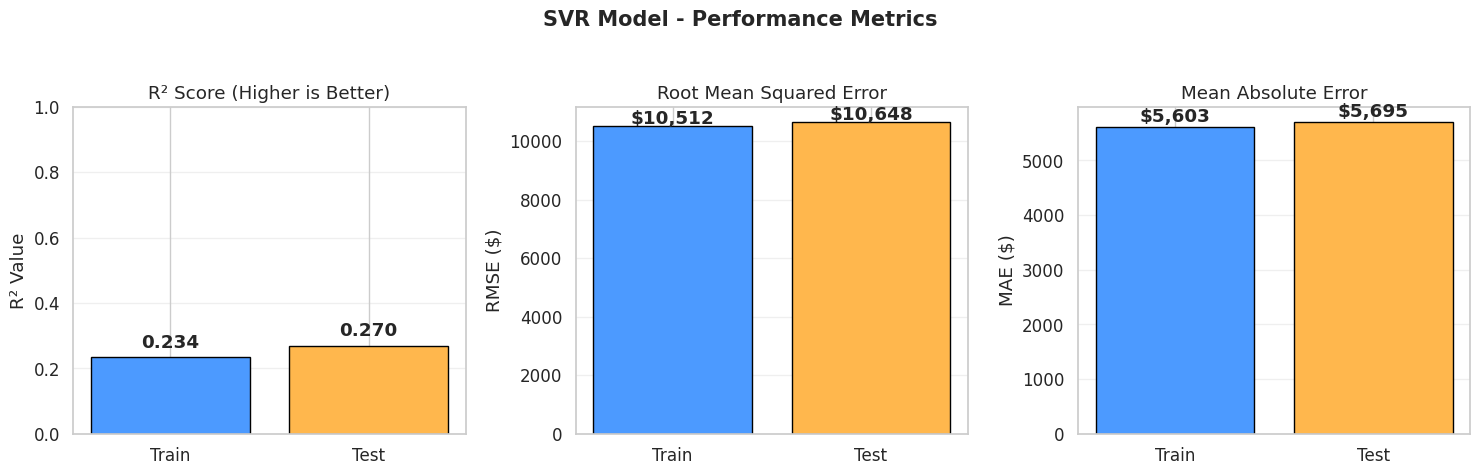

In [76]:


from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# --- 1️⃣ Train the SVR model ---
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# --- 2️⃣ Make predictions ---
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# --- 3️⃣ Evaluate performance ---
r2_train_svr = r2_score(y_train, y_train_pred_svr)
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)

r2_test_svr = r2_score(y_test, y_test_pred_svr)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)

# --- 4️⃣ Display results ---
print("=" * 70)
print("SUPPORT VECTOR REGRESSION (SVR) - PERFORMANCE SUMMARY")
print("=" * 70)

print("\nTRAINING SET:")
print("-" * 70)
print(f"R² Score : {r2_train_svr:.4f} ({r2_train_svr*100:.2f}%)")
print(f"MSE      : ${mse_train_svr:,.2f}")
print(f"RMSE     : ${rmse_train_svr:,.2f}")
print(f"MAE      : ${mae_train_svr:,.2f}")

print("\nTESTING SET:")
print("-" * 70)
print(f"R² Score : {r2_test_svr:.4f} ({r2_test_svr*100:.2f}%)")
print(f"MSE      : ${mse_test_svr:,.2f}")
print(f"RMSE     : ${rmse_test_svr:,.2f}")
print(f"MAE      : ${mae_test_svr:,.2f}")

print("\nDIFFERENCE (Train - Test):")
print("-" * 70)
print(f"Δ R²   : {r2_train_svr - r2_test_svr:.4f}")
print(f"Δ RMSE : ${rmse_train_svr - rmse_test_svr:,.2f}")
print(f"Δ MAE  : ${mae_train_svr - mae_test_svr:,.2f}")

# --- 5️⃣ Visualization ---
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("SVR Model - Performance Metrics", fontsize=15, fontweight="bold")

colors = ["#4C9AFF", "#FFB74D"]
labels = ["Train", "Test"]

# R²
ax[0].bar(labels, [r2_train_svr, r2_test_svr], color=colors, edgecolor="black")
ax[0].set_title("R² Score (Higher is Better)")
ax[0].set_ylabel("R² Value")
ax[0].set_ylim(0, 1)
for i, v in enumerate([r2_train_svr, r2_test_svr]):
    ax[0].text(i, v + 0.03, f"{v:.3f}", ha="center", fontweight="bold")

# RMSE
ax[1].bar(labels, [rmse_train_svr, rmse_test_svr], color=colors, edgecolor="black")
ax[1].set_title("Root Mean Squared Error")
ax[1].set_ylabel("RMSE ($)")
for i, v in enumerate([rmse_train_svr, rmse_test_svr]):
    ax[1].text(i, v + 100, f"${v:,.0f}", ha="center", fontweight="bold")

# MAE
ax[2].bar(labels, [mae_train_svr, mae_test_svr], color=colors, edgecolor="black")
ax[2].set_title("Mean Absolute Error")
ax[2].set_ylabel("MAE ($)")
for i, v in enumerate([mae_train_svr, mae_test_svr]):
    ax[2].text(i, v + 100, f"${v:,.0f}", ha="center", fontweight="bold")

for a in ax:
    a.grid(axis="y", alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Task 7 - Repeat step 4 using an SVR model. You may experiment by performing hyperparameter tuning.

FINAL MODEL COMPARISON: LINEAR REGRESSION vs SVR

       Metric Linear Regression Support Vector Regression
     R² Score            0.7836                    0.2697
     RMSE ($)         $5,796.28                $10,647.75
      MAE ($)         $4,181.19                 $5,695.16
Training Time         Very Fast                  Moderate
   Complexity               Low                    Medium


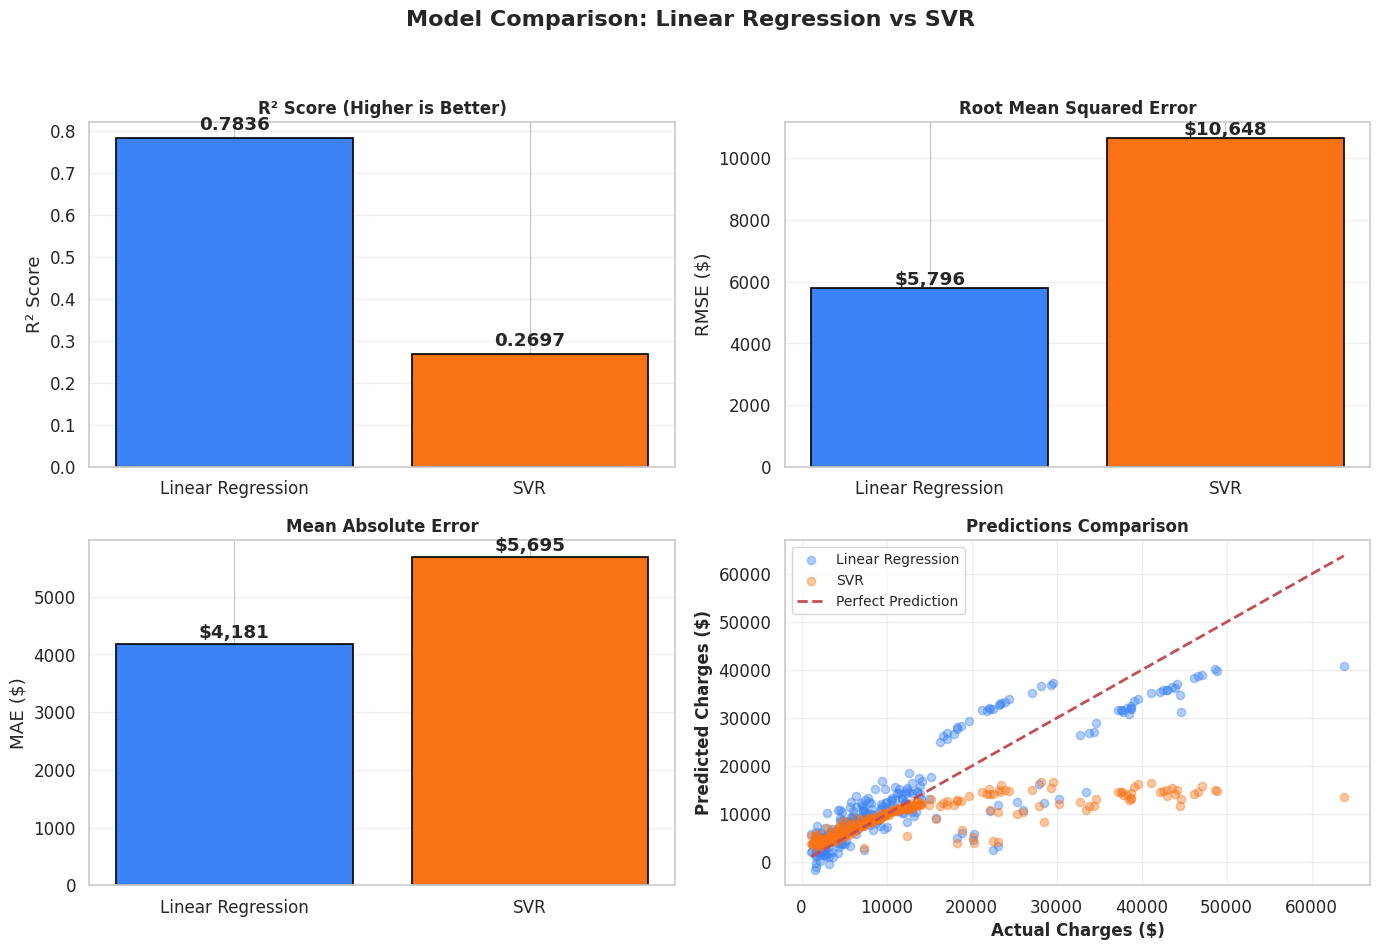

In [78]:
# ===============================================
# 🧩 FINAL MODEL COMPARISON: LINEAR REGRESSION vs BASIC SVR
# ===============================================

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ----------------------------------------------------------
# 1️⃣ Ensure we have predictions for Linear Regression
# ----------------------------------------------------------
y_test_pred_lr = linreg.predict(X_test_scaled)
y_train_pred_lr = linreg.predict(X_train_scaled)

r2_test_lr = r2_score(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)

# ----------------------------------------------------------
# 2️⃣ Ensure we have predictions for SVR
# ----------------------------------------------------------
y_test_pred_svr = svr_model.predict(X_test_scaled)
y_train_pred_svr = svr_model.predict(X_train_scaled)

r2_test_svr = r2_score(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)

# ----------------------------------------------------------
# 3️⃣ Create a summary DataFrame (only two models here)
# ----------------------------------------------------------
print("=" * 80)
print("FINAL MODEL COMPARISON: LINEAR REGRESSION vs SVR")
print("=" * 80)

comparison_data = {
    "Metric": ["R² Score", "RMSE ($)", "MAE ($)", "Training Time", "Complexity"],
    "Linear Regression": [
        f"{r2_test_lr:.4f}",
        f"${rmse_test_lr:,.2f}",
        f"${mae_test_lr:,.2f}",
        "Very Fast",
        "Low",
    ],
    "Support Vector Regression": [
        f"{r2_test_svr:.4f}",
        f"${rmse_test_svr:,.2f}",
        f"${mae_test_svr:,.2f}",
        "Moderate",
        "Medium",
    ],
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# ----------------------------------------------------------
# 4️⃣ Visualize Comparison
# ----------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Model Comparison: Linear Regression vs SVR", fontsize=16, fontweight="bold")

models = ["Linear Regression", "SVR"]
colors = ["#3B82F6", "#F97316"]

# --- R² ---
r2_vals = [r2_test_lr, r2_test_svr]
bars1 = axes[0, 0].bar(models, r2_vals, color=colors, edgecolor="black", linewidth=1.2)
axes[0, 0].set_title("R² Score (Higher is Better)", fontsize=12, fontweight="bold")
axes[0, 0].set_ylabel("R² Score")
axes[0, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(r2_vals):
    axes[0, 0].text(i, v + 0.02, f"{v:.4f}", ha="center", fontweight="bold")

# --- RMSE ---
rmse_vals = [rmse_test_lr, rmse_test_svr]
bars2 = axes[0, 1].bar(models, rmse_vals, color=colors, edgecolor="black", linewidth=1.2)
axes[0, 1].set_title("Root Mean Squared Error", fontsize=12, fontweight="bold")
axes[0, 1].set_ylabel("RMSE ($)")
axes[0, 1].grid(axis="y", alpha=0.3)
for i, v in enumerate(rmse_vals):
    axes[0, 1].text(i, v + 100, f"${v:,.0f}", ha="center", fontweight="bold")

# --- MAE ---
mae_vals = [mae_test_lr, mae_test_svr]
bars3 = axes[1, 0].bar(models, mae_vals, color=colors, edgecolor="black", linewidth=1.2)
axes[1, 0].set_title("Mean Absolute Error", fontsize=12, fontweight="bold")
axes[1, 0].set_ylabel("MAE ($)")
axes[1, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(mae_vals):
    axes[1, 0].text(i, v + 100, f"${v:,.0f}", ha="center", fontweight="bold")

# --- Overlay plot (Predictions vs Actual) ---
axes[1, 1].scatter(y_test, y_test_pred_lr, alpha=0.4, color="#3B82F6", s=35, label="Linear Regression")
axes[1, 1].scatter(y_test, y_test_pred_svr, alpha=0.4, color="#F97316", s=35, label="SVR")
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                "r--", lw=2, label="Perfect Prediction")
axes[1, 1].set_xlabel("Actual Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_ylabel("Predicted Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_title("Predictions Comparison", fontsize=12, fontweight="bold")
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
